In [1]:
# We are going to make a heatmap of the location + total number of significant SNPs in the observed data

import numpy as np
import pandas as pd

In [2]:
df_annotations = {}

for i in range(1, 23):
    df_annotations[i] = pd.read_csv(f"{i}permutationready.tsv", sep="\t")

In [3]:
df_annotations[1]

,location,significant,3_prime_UTR_variant,5_prime_UTR_variant,NMD_transcript_variant,coding_sequence_variant,downstream_gene_variant,incomplete_terminal_codon_variant,intergenic_variant,intron_variant,...,non_coding_transcript_variant,splice_acceptor_variant,splice_donor_variant,splice_region_variant,start_lost,stop_gained,stop_lost,stop_retained_variant,synonymous_variant,upstream_gene_variant
0,69487,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,69569,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,139853,0.0,0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,693731,0.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,707522,0.0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948312,249229734,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
948313,249229967,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
948314,249230279,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
948315,249230793,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# calculate original number of sign SNPs in each annotation

# do for all chromosomes
df_noheader = {}
np_df = {}
location_vec = {}
annotation_matrix = {}
a_matrix = {}

for i in range(1,23):
    df_noheader[i] = df_annotations[i].copy()
    np_df[i] = df_noheader[i].to_numpy()
    location_vec[i] = np_df[i][::,1]
    annotation_matrix[i] = np_df[i][::,2:]
    a_matrix[i] = annotation_matrix[i].transpose()


original_number = {}

for i in range(1,23):
    original_number[i] = np.matmul(a_matrix[i],location_vec[i])

In [8]:
type(original_number[1])

numpy.ndarray

In [9]:
SNP_number = np.zeros((22,21))

for i in range(1,23):
    SNP_number[i-1,::] = original_number[i]

In [17]:
np.min(SNP_number)

0.0

[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '6'),
 Text(0, 6.5, '7'),
 Text(0, 7.5, '8'),
 Text(0, 8.5, '9'),
 Text(0, 9.5, '10'),
 Text(0, 10.5, '11'),
 Text(0, 11.5, '12'),
 Text(0, 12.5, '13'),
 Text(0, 13.5, '14'),
 Text(0, 14.5, '15'),
 Text(0, 15.5, '16'),
 Text(0, 16.5, '17'),
 Text(0, 17.5, '18'),
 Text(0, 18.5, '19'),
 Text(0, 19.5, '20'),
 Text(0, 20.5, '21'),
 Text(0, 21.5, '22')]

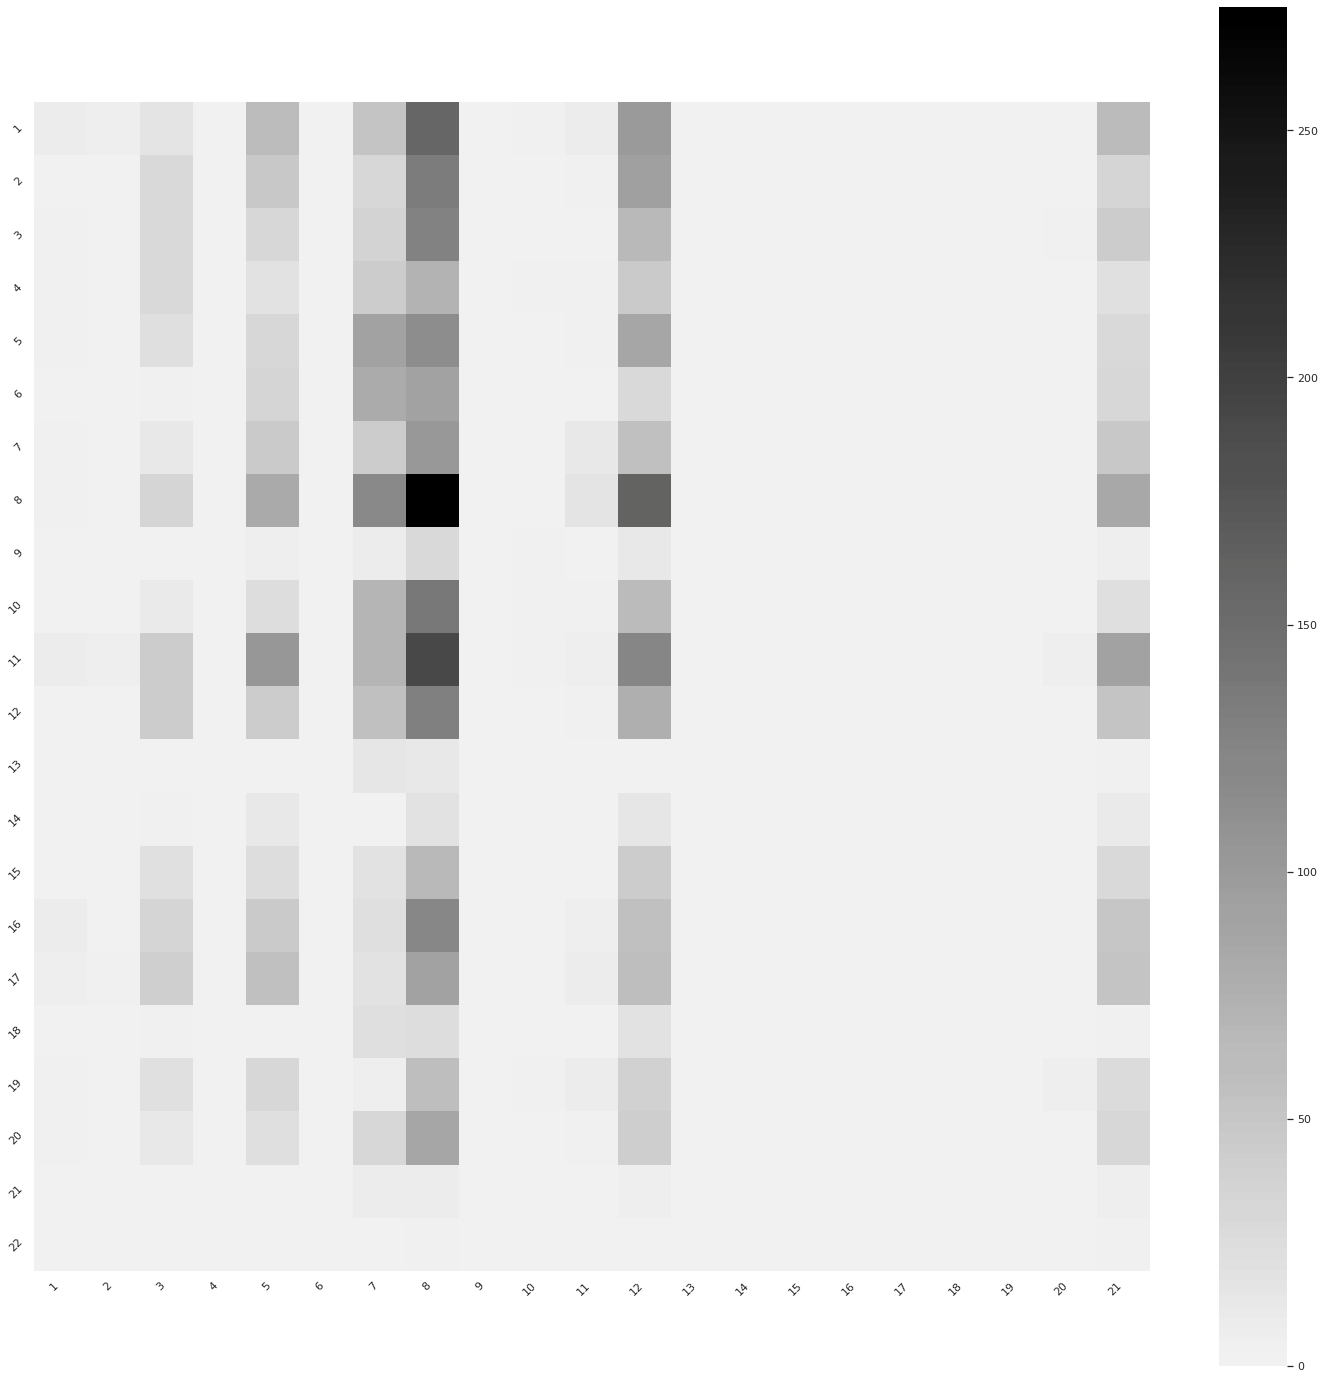

In [56]:
import seaborn as sns

mat1 = sns.heatmap(SNP_number, vmin = 0 , vmax = 275, center=0, cmap=sns.diverging_palette(0, 10, l=0, n=275, center='light'), linecolor='white', square=True)
sns.set(rc={'figure.figsize':(25,25)})

x = range(1,22)
y = range(1,23)
#mat1.set_ticks(np.arange(SNP_number.shape[1]), labels=col_labels)
mat1.set_xticklabels(x, rotation=45,horizontalalignment='right')
mat1.set_yticklabels(y, rotation=45,horizontalalignment='right')


[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '6'),
 Text(0, 6.5, '7'),
 Text(0, 7.5, '8'),
 Text(0, 8.5, '9'),
 Text(0, 9.5, '10'),
 Text(0, 10.5, '11'),
 Text(0, 11.5, '12'),
 Text(0, 12.5, '13'),
 Text(0, 13.5, '14'),
 Text(0, 14.5, '15'),
 Text(0, 15.5, '16'),
 Text(0, 16.5, '17'),
 Text(0, 17.5, '18'),
 Text(0, 18.5, '19'),
 Text(0, 19.5, '20'),
 Text(0, 20.5, '21'),
 Text(0, 21.5, '22')]

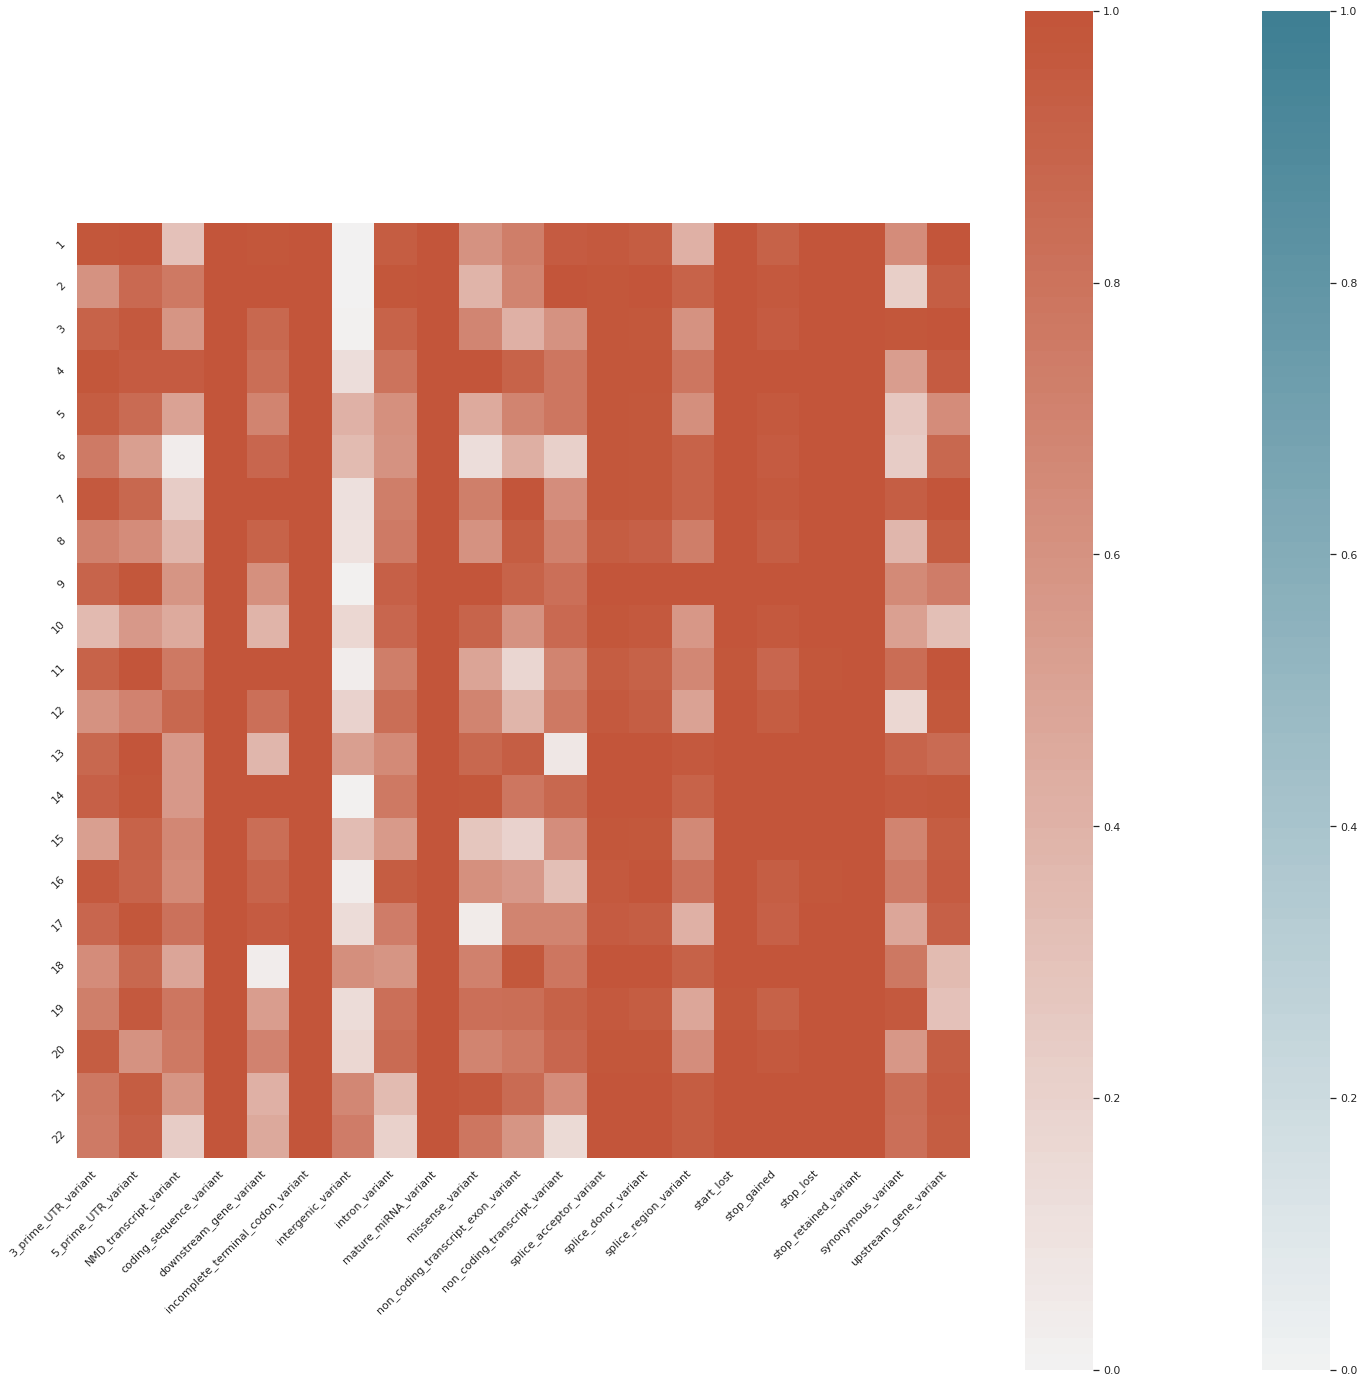

In [53]:
# Now we make a figure that gives us the p-vals and the number of SNPs

# First read in the p-val data

# We want the pvals of both enrichment and depletion -- they are separate below 

pvals_df = pd.read_csv("pvals_enriched.tsv", sep="\t")
pvals_df.columns = ['3_prime_UTR_variant','5_prime_UTR_variant','NMD_transcript_variant','coding_sequence_variant','downstream_gene_variant','incomplete_terminal_codon_variant','intergenic_variant','intron_variant','mature_miRNA_variant','missense_variant','non_coding_transcript_exon_variant','non_coding_transcript_variant','splice_acceptor_variant','splice_donor_variant','splice_region_variant','start_lost','stop_gained','stop_lost','stop_retained_variant','synonymous_variant','upstream_gene_variant']

ax = sns.heatmap(pvals_df, vmin = 0, vmax = 1, center=0, cmap=sns.diverging_palette(20, 220, n=200), linecolor='white', square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')
y = range(1,23)
ax.set_yticklabels(y, rotation=45,horizontalalignment='right')


# Depletion

pvals2_df = pd.read_csv("pvals_depleted.tsv", sep="\t")
pvals2_df.columns = ['3_prime_UTR_variant','5_prime_UTR_variant','NMD_transcript_variant','coding_sequence_variant','downstream_gene_variant','incomplete_terminal_codon_variant','intergenic_variant','intron_variant','mature_miRNA_variant','missense_variant','non_coding_transcript_exon_variant','non_coding_transcript_variant','splice_acceptor_variant','splice_donor_variant','splice_region_variant','start_lost','stop_gained','stop_lost','stop_retained_variant','synonymous_variant','upstream_gene_variant']

ax2 = sns.heatmap(pvals2_df, vmin = 0, vmax = 1, center=0, cmap=sns.diverging_palette(220, 20, n=200), linecolor='white', square=True)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45,horizontalalignment='right')
y = range(1,23)
ax2.set_yticklabels(y, rotation=45,horizontalalignment='right')

